In [283]:
import pandas as pd
data = pd.read_csv('Data3.csv',index_col='S.No')

In [284]:
d1 = data[data.Designation == "Sales Executive"]
d1 = d1.iloc[:,10].to_frame().join(d1.iloc[:,7].to_frame()) 
d2 = data[data.Designation == "Sr Sales Executive"]
d2 = d2.iloc[:,10].to_frame().join(d2.iloc[:,7].to_frame()) 

In [285]:
W = d1[d1.Zone == 'West'].iloc[:,1].mean()
E = d1[d1.Zone == 'East'].iloc[:,1].mean()
C = d1[d1.Zone == 'Central'].iloc[:,1].mean()
N = d1[d1.Zone == 'North'].iloc[:,1].mean()
S = d1[d1.Zone == 'South'].iloc[:,1].mean()
H = d1[d1.Zone == 'HO'].iloc[:,1].mean()

W2 = d2[d2.Zone == 'West'].iloc[:,1].mean()
E2 = d2[d2.Zone == 'East'].iloc[:,1].mean()
C2 = d2[d2.Zone == 'Central'].iloc[:,1].mean()
N2 = d2[d2.Zone == 'North'].iloc[:,1].mean()
S2 = d2[d2.Zone == 'South'].iloc[:,1].mean()
H2 = d2[d2.Zone == 'HO'].iloc[:,1].mean()

In [286]:
d1.groupby('Zone')
d2.groupby('Zone')

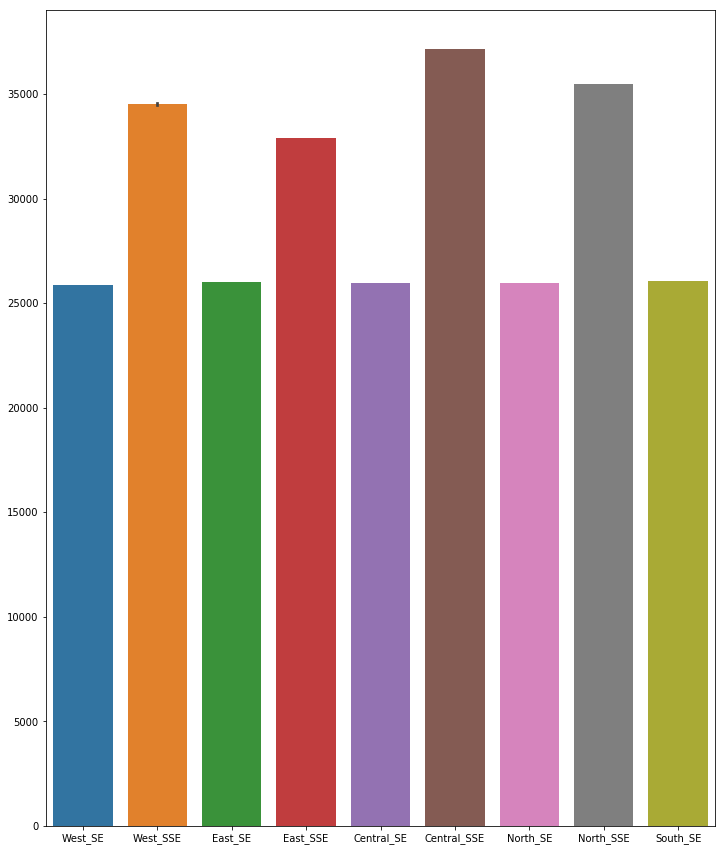

In [287]:
import matplotlib
import seaborn as sns
from matplotlib.pyplot import figure 
import matplotlib.pyplot as plt

figure(figsize=(12,15))
sns.barplot(x = ['West_SE','West_SSE','East_SE','East_SSE','Central_SE','Central_SSE','North_SE','North_SSE','South_SE','West_SSE'], y =[W,W2,E,E2,C,C2,N,N2,S,S2])
plt.savefig("g1.png")

everyone of the Sales Executives get the same average payment at all zones

figure(figsize=(15,10))
sns.countplot(x = data[data.Zone == 'Central']["Last Rating"],hue = data[data.Zone == 'Central'].Remarks)
plt.savefig('g3.png')

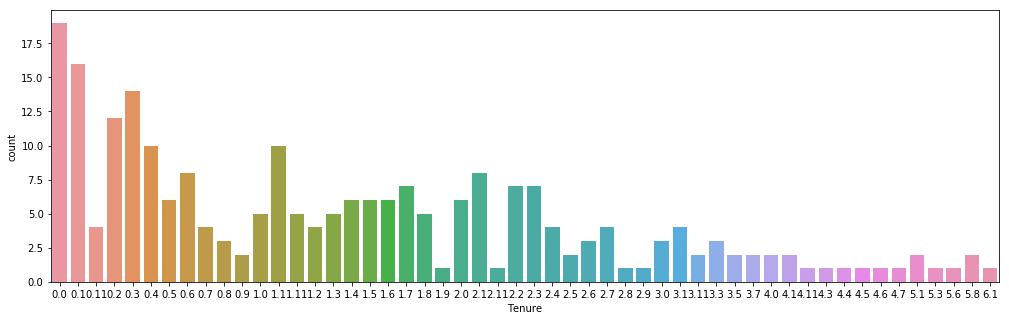

In [288]:
figure(figsize=(17,5))
sns.countplot(x = data[data.Designation == "Sales Executive"].Tenure) 
plt.savefig('g2.png')

Most people are leaving before completion of 2 years in the company.

<Figure size 360x360 with 0 Axes>

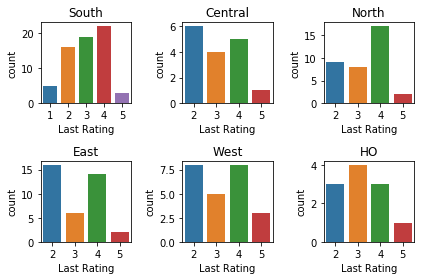

In [290]:
import matplotlib.pyplot as plt
figure(figsize=(5,5))
f, axes = plt.subplots(2, 3)

d4 = data[data.Zone == 'South']
sns.countplot(x = d4[d4.Tenure > 1.00]['Last Rating'], orient='v' ,ax=axes[0][0]).set_title('South')

d5 = data[data.Zone == 'Central']
sns.countplot(x = d5[d5.Tenure > 1.00]['Last Rating'], orient='v' ,ax=axes[0][1]).set_title('Central')

d6 = data[data.Zone == 'East']
sns.countplot(x = d6[d6.Tenure > 1.00]['Last Rating'], orient='v' ,ax=axes[1][0]).set_title('East')

d7 = data[data.Zone == 'West']
sns.countplot(x = d7[d7.Tenure > 1.00]['Last Rating'], orient='v' ,ax=axes[1][1]).set_title('West')

d8 = data[data.Zone == 'North']
sns.countplot(x = d8[d8.Tenure > 1.00]['Last Rating'], orient='v' ,ax=axes[0][2]).set_title('North')

d9 = data[data.Zone == 'HO']
sns.countplot(x = d9[d9.Tenure > 1.00]['Last Rating'], orient='v' ,ax=axes[1][2]).set_title('HO')

f.tight_layout()

plt.savefig('g7.png')

In North and South regions the people leaving have high ratings which means there are ample jobs available for the people with high capabilities, but for East and North people with relatively low ratings are leaving or being terminated.

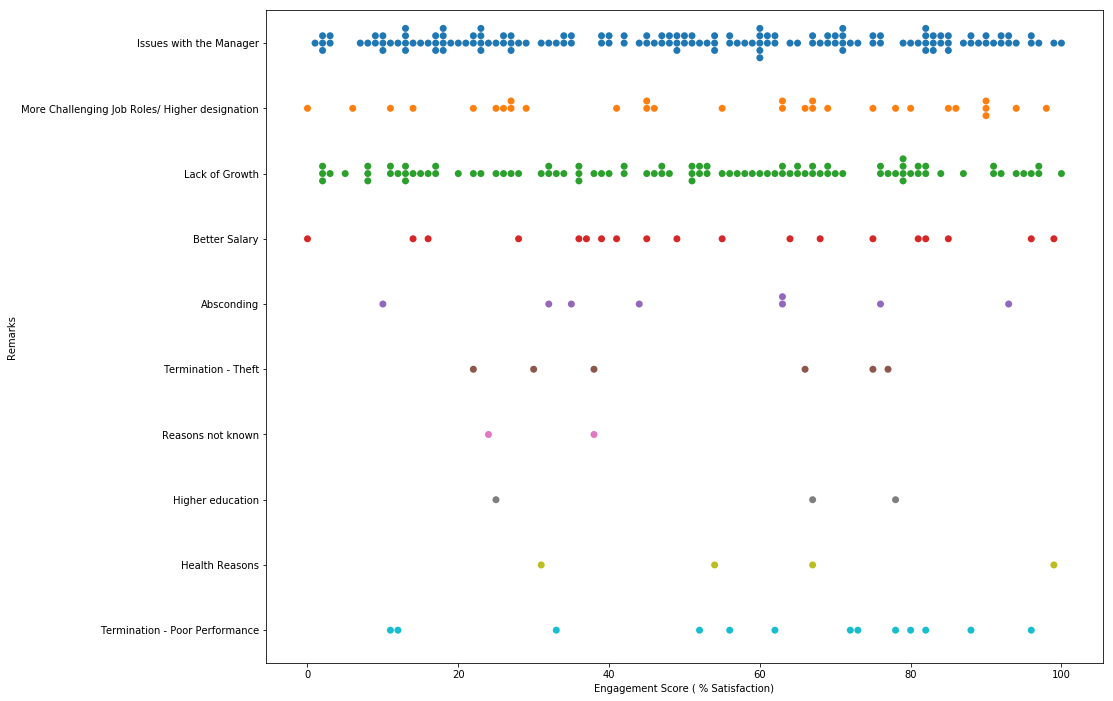

In [291]:
figure(figsize=(15,12))
sns.swarmplot(x = data["Engagement Score ( % Satisfaction)"],y = data.Remarks, s=7 )

Almost equal distribution across all Remarks.So Engagement score doesn't affect the Attrition.

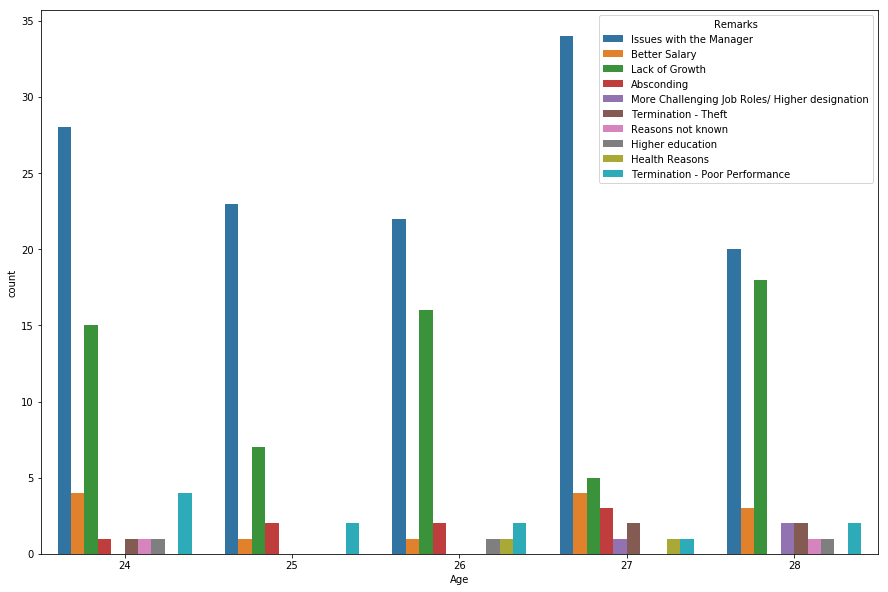

In [292]:
figure(figsize=(15,10))
sns.countplot(x = data[data.Designation == "Sales Executive"].Age,hue = data[data.Designation == "Sales Executive"].Remarks )
plt.savefig('g4.png')

More numbers of employers leave with a issue with a manager at a less tenure

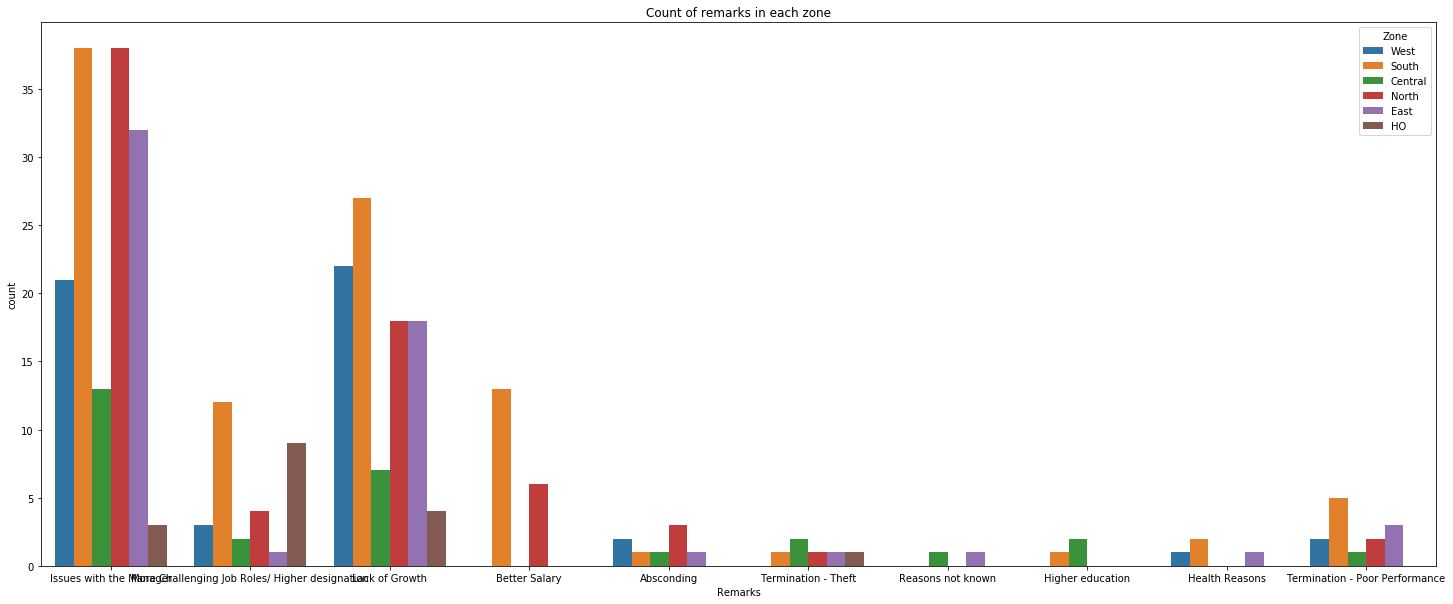

In [302]:
figure(figsize=(25,10))
sns.countplot(x = data.Remarks,hue =  data.Zone).set_title('Count of remarks in each zone') 
plt.savefig('g6.png')

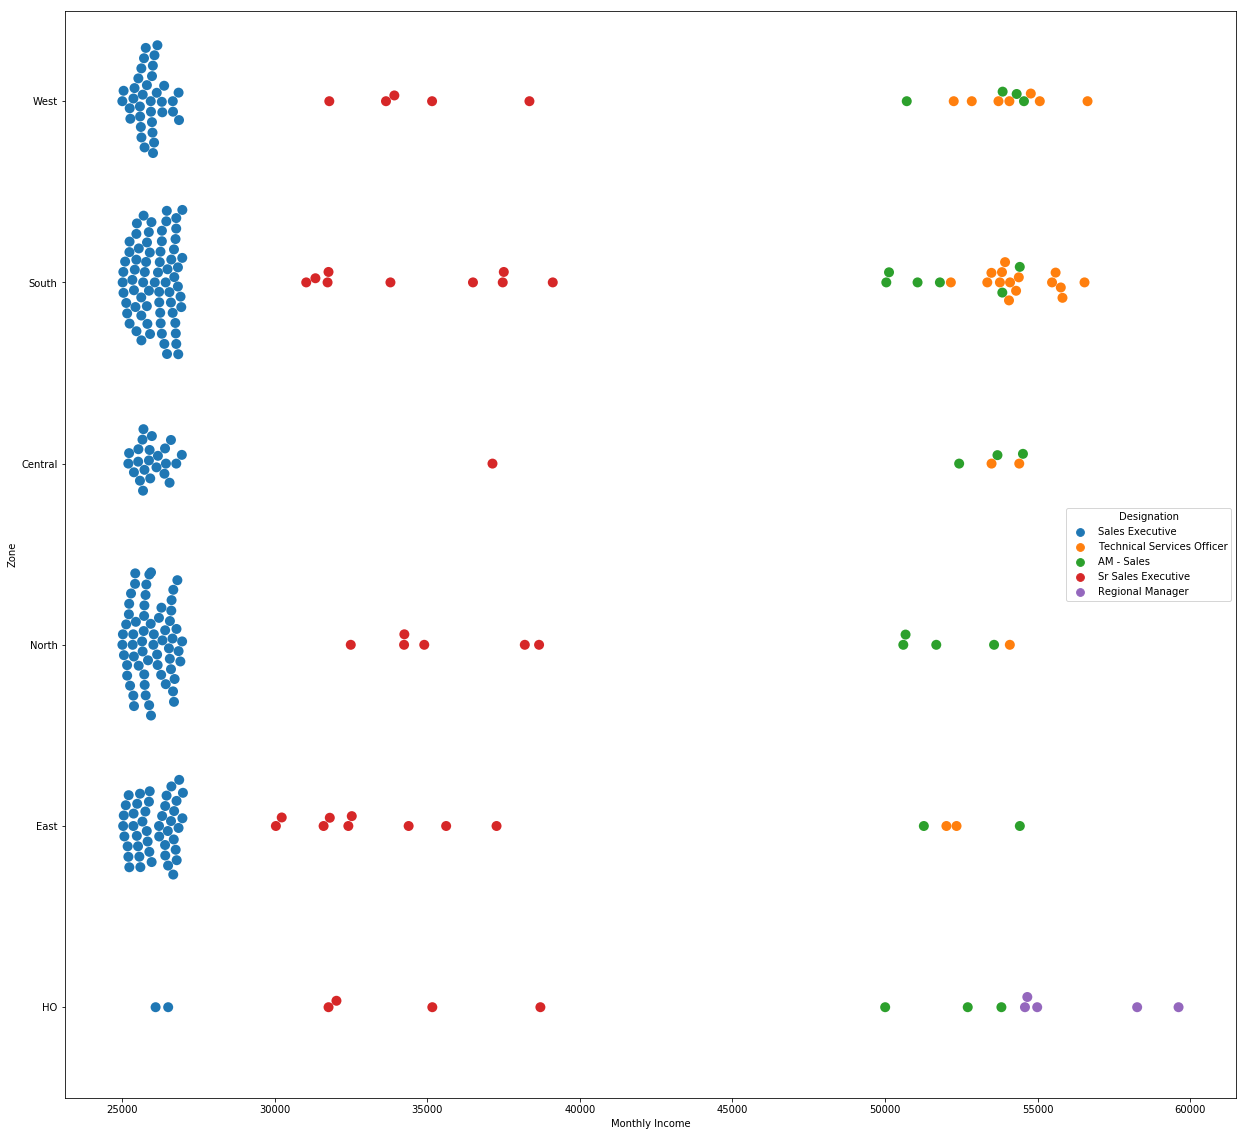

In [294]:
figure(figsize=(21,20))
sns.swarmplot(x = data[data["Monthly Income"]<70000]["Monthly Income"],y = data[data["Monthly Income"]<70000].Zone,hue =data[data["Monthly Income"]<70000].Designation,
              s=10)

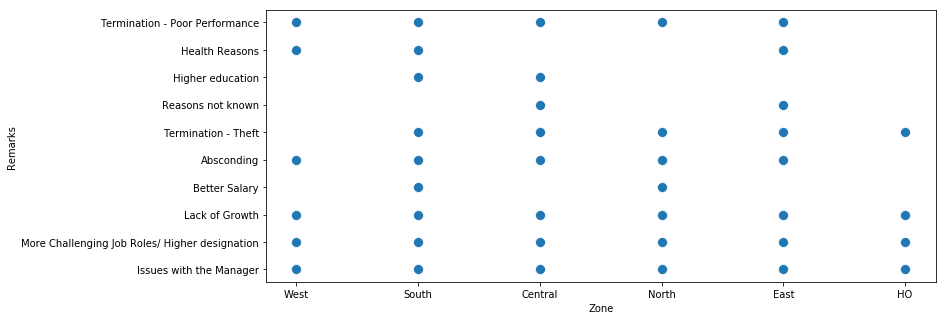

In [295]:
figure(figsize=(12,5))
sns.scatterplot(x = data.Zone,y=data.Remarks,s=100)
plt.savefig('g5.png')

In Central the better salary remark is missing as the higher posts are being payed enough whereas in other regions higher paying jobs are not that available or they are satisfied with their company.

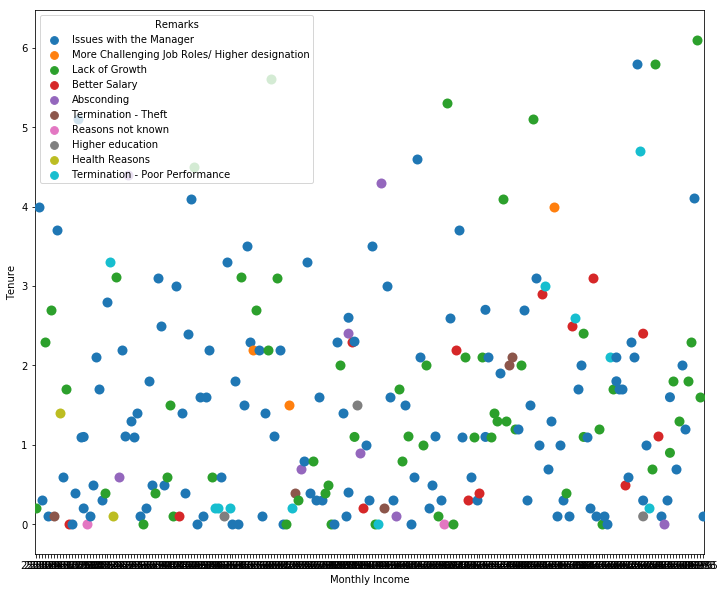

In [307]:
figure(figsize=(12,10))
d1 = data[data.Designation == "Sales Executive"]
#d1 = d1[d1.Remarks == "Lack of Growth"]
sns.swarmplot(x = d1["Monthly Income"],y = d1["Tenure"] ,hue =data.Remarks, s=10 ) 
# Not conclusive

In [308]:
#(d1["Tenure"]<0.6).sum()
data.corr(method ='pearson')

,Tenure,Age,Last Rating,Monthly Income,Engagement Score ( % Satisfaction)
Tenure,1.000000,0.126795,-0.122294,0.128781,-0.037403
Age,0.126795,1.000000,-0.000934,0.797063,0.070630
Last Rating,-0.122294,-0.000934,1.000000,-0.039690,-0.019789
Monthly Income,0.128781,0.797063,-0.039690,1.000000,0.058983
Engagement Score ( % Satisfaction),-0.037403,0.070630,-0.019789,0.058983,1.000000


There is a lot of correlation between age and monthly income which should be the case.

In [309]:
# for i in range(1,327):
#    data.Tenure[i] = data.Tenure[i].replace(" ","")
#data.Tenure.astype(float)

In [310]:
data.Designation.value_counts()

Sales Executive               235
Sr Sales Executive             34
Technical Services Officer     27
AM - Sales                     22
Regional Manager                5
Zonal Manager                   3
National Sales Head             1
Name: Designation, dtype: int64